#**Exploitary Data Analysis Steps**

- Understanding data.(data load,check info of data)
- Clean the data(Check null values,remove duplicates)
- Descriptive Statistics. (Descibe the data)
- Visualization
- Co-relation analysis(Feature Selection based on target)
- Outlayer removal (using IQR method or z-score method)
- Data Scaling(Minmax scaler or standard scaler)
- Model Training
- Model Accuracy Testing

#**Understanding Data**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


#**Data Cleaning**

In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
# Here we have 891 rows . In deck there are 688 null values. if the null values for a column is higher than 50% of total data we drop the column entirely.

df.drop('deck',axis=1,inplace= True) #inplace = True is given to make the change in originl dataframe.

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


Next step is to fill the data for age column. First we checked whether the data is qualitative or quantitative. if Qualitative we fill the null values with mode value. If Quantitative we fill the null values with mean and median. To decide between mean and median we take the histogram of the specified column. Here the histogram of age indicates its a skewed data. If it was Normally distributed we will fill the null values with mean value of respective column. Since here its skewed we fill with median value.

<Axes: >

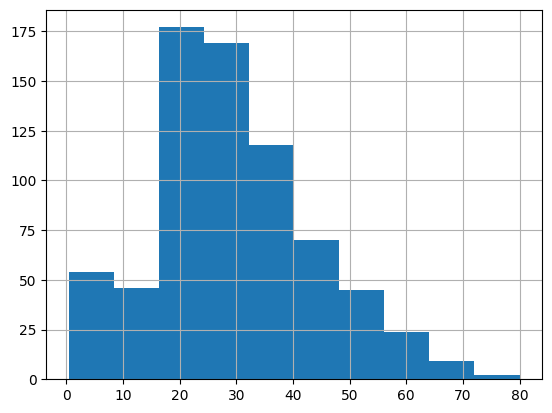

In [ ]:
df['age'].hist()

In [ ]:
df['age'].fillna(df['age'].median(),inplace = True)

<ipython-input-8-02ce21afc529>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace = True)


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
df['embarked'].fillna(df['embarked'].mode()[0],inplace = True)

<ipython-input-10-d863a1b26ebb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0],inplace = True)


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
df.dropna(subset =['embark_town'],inplace= True)

In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


Checking Duplicates

In [ ]:
df.duplicated().sum() # Duplicates are found. because we got the sum as 116

np.int64(116)

In [ ]:
# Removing Duplicates

df.drop_duplicates(inplace= True)

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
# Removing duplicate columns

df.drop(['alive','embark_town','who','class'],axis=1,inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,True,False
1,1,1,female,38.0,1,0,71.2833,C,False,False
2,1,3,female,26.0,0,0,7.9250,S,False,True
3,1,1,female,35.0,1,0,53.1000,S,False,False
4,0,3,male,35.0,0,0,8.0500,S,True,True
...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,False,False
887,1,1,female,19.0,0,0,30.0000,S,False,True
888,0,3,female,28.0,1,2,23.4500,S,False,False
889,1,1,male,26.0,0,0,30.0000,C,True,True


#**Descriptive Statistics**

In [ ]:
df.describe() #will give statistical information about data

,survived,pclass,age,sibsp,parch,fare
count,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000
mean,0.411384,2.249677,29.528357,0.530401,0.421734,34.761659
std,0.492403,0.852315,13.731264,0.991241,0.841380,52.425906
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.900000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,33.500000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#**Data Visualization**

<Axes: >

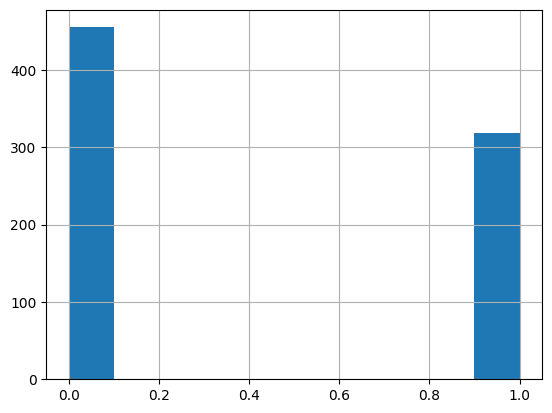

In [ ]:
df['survived'].hist()

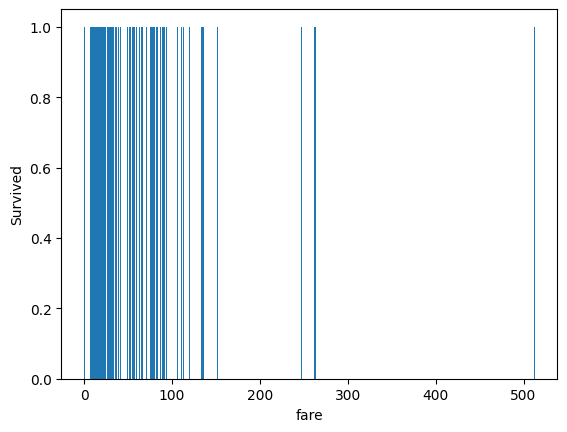

In [ ]:
x = df['fare']
y = df['survived']
plt.bar(x,y)
plt.xlabel('fare')
plt.ylabel('Survived')
plt.show()

<Axes: xlabel='age', ylabel='Count'>

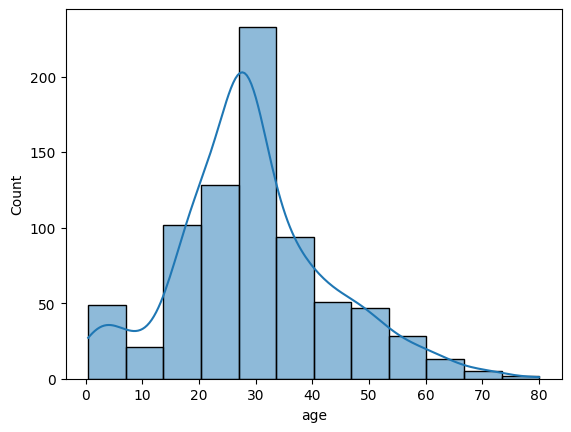

In [ ]:
sns.histplot(df['age'],kde= True,bins = 12)


<Axes: xlabel='age', ylabel='Count'>

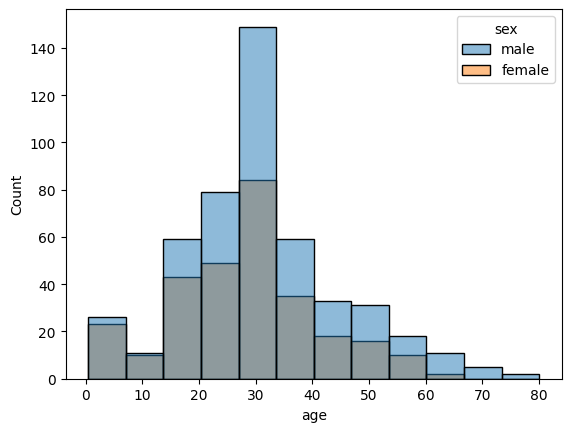

In [ ]:
sns.histplot(data=df, x='age', hue='sex', kde=False, bins=12)

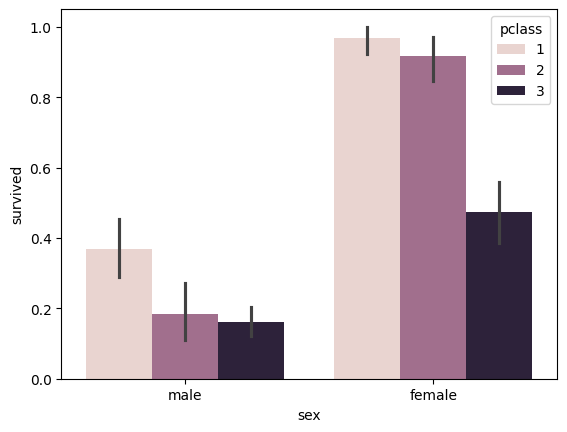

In [ ]:
sns.barplot(data =df,x='sex',y='survived',hue = 'pclass') #hue will display data based on the unique values count which is splitted on color wise
plt.show()

<Axes: xlabel='survived', ylabel='age'>

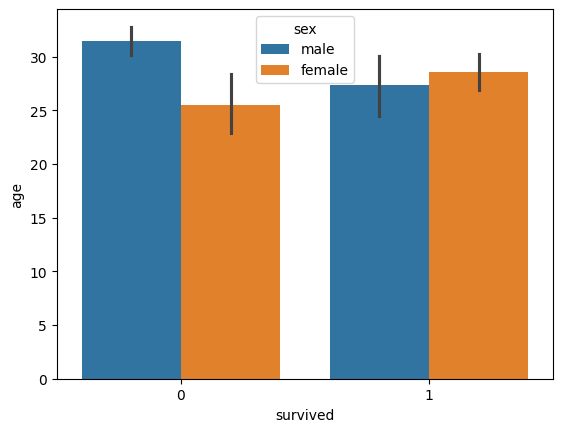

In [ ]:
sns.barplot(data =df,x ='survived',y= 'age',hue='sex')

<Axes: xlabel='embarked', ylabel='survived'>

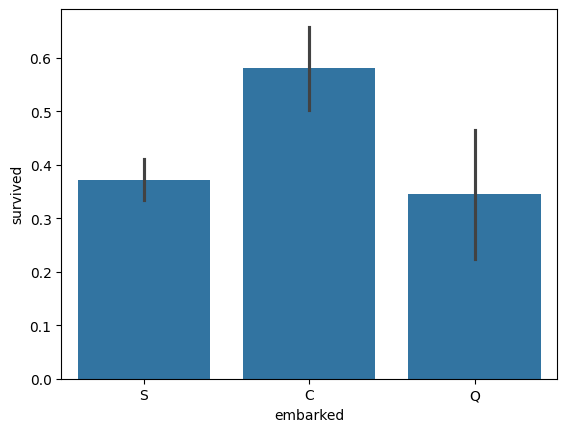

In [ ]:
sns.barplot(data=df,x='embarked',y='survived')

#**Correlation Analysis**

To do the correlation analysis we need to convert all the categorical values to integer. That is dtype category,object need to be converted to integer. Here we are using label encoder for that

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,True,False
1,1,1,female,38.0,1,0,71.2833,C,False,False
2,1,3,female,26.0,0,0,7.9250,S,False,True
3,1,1,female,35.0,1,0,53.1000,S,False,False
4,0,3,male,35.0,0,0,8.0500,S,True,True
...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,False,False
887,1,1,female,19.0,0,0,30.0000,S,False,True
888,0,3,female,28.0,1,2,23.4500,S,False,False
889,1,1,male,26.0,0,0,30.0000,C,True,True


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['sex'] = encoder.fit_transform(df['sex'])
df['embarked'] = encoder.fit_transform(df['embarked'])
df['adult_male'] = encoder.fit_transform(df['adult_male'])
df['alone'] = encoder.fit_transform(df['alone'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 773 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    773 non-null    int64  
 1   pclass      773 non-null    int64  
 2   sex         773 non-null    int64  
 3   age         773 non-null    float64
 4   sibsp       773 non-null    int64  
 5   parch       773 non-null    int64  
 6   fare        773 non-null    float64
 7   embarked    773 non-null    int64  
 8   adult_male  773 non-null    int64  
 9   alone       773 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 66.4 KB


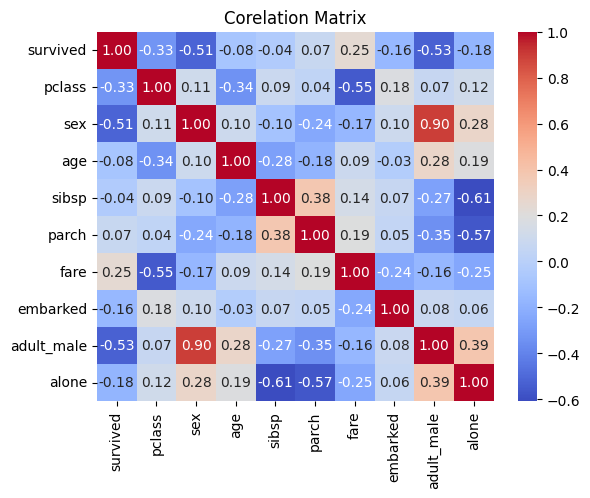

In [ ]:
# Check correlation

sns.heatmap(df.corr(),annot= True,fmt='.02f',cmap='coolwarm')
plt.title('Corelation Matrix')
plt.show()

## Feature Selection


- Independent Variable
 - Here we will check  whether independent variables have high correlation. Any value higher than +.75 or -.75 is considered high corelation.(will not consider target)
 - Then we will check the corelation of the selected columns. We will compare the corelation with the target will keep the column with high corelation and drop the others.

- Dependent Variable
 - We select a threshold value depending on the total features corelations. Here max value is 0.6 so we choose the threshold as 0.3.

In [ ]:
df.drop('sex',axis =1,inplace=True)

In [ ]:
# drop the columns according to chosen threshold value
df.drop(['embarked','parch','sibsp','age'],axis =1,inplace=True)

In [ ]:
df

,survived,pclass,fare,adult_male,alone
0,0,3,7.2500,1,0
1,1,1,71.2833,0,0
2,1,3,7.9250,0,1
3,1,1,53.1000,0,0
4,0,3,8.0500,1,1
...,...,...,...,...,...
885,0,3,29.1250,0,0
887,1,1,30.0000,0,1
888,0,3,23.4500,0,0
889,1,1,30.0000,1,1


#**Train the model without scaling and outlayer removal**

In [ ]:
from sklearn.linear_model import LogisticRegression
x = df.drop(['survived'],axis =1)
y = df['survived']


In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)
model = LogisticRegression()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
print(ypred)

[0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0
 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1
 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


Checking Accuracy

In [ ]:
accuracy = model.score(xtest,ytest)
print(accuracy)

0.7483870967741936


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest,ypred)
print(accuracy)

0.7483870967741936


#**Removing Outliers**
We use IQR method to remove the outliers. An outlier is a data point that is significantly different from the rest of the values in a dataset.

It lies far away from the "normal" range — either much higher or much lower than the majority of the data.

IQR = Q3 - Q1

Q1 = 25th percentile

Q3 = 75th percentile

Outlier Thresholds:

Lower Bound = Q1 - 1.5 × IQR

Upper Bound = Q3 + 1.5 × IQR

Any data point outside this range is considered an outlier.

In [ ]:
# def removeoutlier(df,exclude_col):
#   for col in df.columns:
#     if col==exclude_col:
#       continue
#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)
#     IQR = q3-q1
#     lower_bound = q1 - 1.5 * IQR
#     upper_bound = q3 + 1.5 * IQR
#     df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]
#   return df


# df_cleaned = removeoutlier(df,exclude_col = 'survived')
# df = df_cleaned

In [ ]:
df

,survived,pclass,fare,adult_male,alone
0,0,3,7.2500,1,0
1,1,1,71.2833,0,0
2,1,3,7.9250,0,1
3,1,1,53.1000,0,0
4,0,3,8.0500,1,1
...,...,...,...,...,...
885,0,3,29.1250,0,0
887,1,1,30.0000,0,1
888,0,3,23.4500,0,0
889,1,1,30.0000,1,1


In [ ]:
# x = df.drop('survived',axis =1)
# y= df['survived']

In [ ]:
# xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)
# model = LogisticRegression()
# model.fit(xtrain,ytrain)
# ypred = model.predict(xtest)
# print(ypred)

In [ ]:
# accuracy = accuracy_score(ytest,ypred)
# accuracy

#**Data Scaling**

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# features = ['pclass','fare','adult_male','alone']
# scaler = MinMaxScaler()
# df = scaler.fit_transform(df[features])
# df

#Dimensionality Reduction

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# features = ['pclass','fare','adult_male','alone']
# x = StandardScaler().fit_transform(df[features])

# #Applying PCA

# pca = PCA(n_components = 2)
# pca_result = pca.fit_transform(x)

# #Add PCA result to Dataframe
# df['pca1']=pca_result[:,0]
# df['pca2']=pca_result[:,1]


In [ ]:
# x = df[['pca1','pca2']]
# y = df['survived']
# xtrain,xtest,ytrain,ytest = train_test_split(xtrain,ytrain,test_size=0.2)
# model = LogisticRegression()
# model.fit(xtrain,ytrain)
# ypred = model.predict(xtest)
# print(ypred)

In [ ]:
# accuracy = accuracy_score(ytest,ypred)
# accuracy



Here we got accuracy low compared to value we got without scaling. So we will not follow the scaling method here

In [ ]:
df

,survived,pclass,fare,adult_male,alone
0,0,3,7.2500,1,0
1,1,1,71.2833,0,0
2,1,3,7.9250,0,1
3,1,1,53.1000,0,0
4,0,3,8.0500,1,1
...,...,...,...,...,...
885,0,3,29.1250,0,0
887,1,1,30.0000,0,1
888,0,3,23.4500,0,0
889,1,1,30.0000,1,1


#Scaling method 2 - Minmax Scaler

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scale = MinMaxScaler()
# features = ['pclass','fare','adult_male','alone']
# scaled_data = scale.fit_transform(df[features])


# scaled_df = pd.DataFrame(scaled_data,columns=features,index=df.index)
# scaled_df

In [ ]:
# x = scaled_df[['pclass','fare','adult_male','alone']]
# y = df['survived']
# xtrain,xtest,ytrain,ytest = train_test_split(xtrain,ytrain,test_size=0.2)
# model = LogisticRegression()
# model.fit(xtrain,ytrain)
# ypred = model.predict(xtest)
# print(ypred)

In [ ]:
# accuracy = accuracy_score(ytest,ypred)
# accuracy

#**Testing in different models**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

x = df.drop(['survived'],axis =1)
y = df['survived']
xtrain,xtest,ytrain,ytest = train_test_split(xtrain,ytrain,test_size=0.2)


models={'Logistic Regression': LogisticRegression(),
        'Decison Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'svm': SVC(),
        'KNN':KNeighborsClassifier()
        }

for model_name,model in models.items():
  model.fit(xtrain,ytrain)
  ypred = model.predict(xtest)
  accuracy = accuracy_score(ytest,ypred)
  print(f'{model_name} accuracy: {accuracy:.2f}')
  print('Classification Report: ')
  print(classification_report(ytest,ypred))
  print('_'*30)

Logistic Regression accuracy: 0.77
Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.96      0.82        70
           1       0.90      0.52      0.66        54

    accuracy                           0.77       124
   macro avg       0.81      0.74      0.74       124
weighted avg       0.80      0.77      0.75       124

______________________________
Decison Tree accuracy: 0.77
Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.81      0.80        70
           1       0.75      0.70      0.72        54

    accuracy                           0.77       124
   macro avg       0.76      0.76      0.76       124
weighted avg       0.77      0.77      0.77       124

______________________________
Random Forest accuracy: 0.75
Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.80      0.78        70
           

Here we found that decisiontree classifier and random forest method got same accurate values. we choose one from these.

In [ ]:
model = DecisionTreeClassifier()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest,ypred)
accuracy

0.7661290322580645